In [1]:
import numpy as np
import pandas as pd
import gc
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score


from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

import xgboost

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import pickle


In [2]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
import pandas as pd

col_names = ['sentiment','id','date','query_string','user','text']
data_path = '/content/training.1600000.processed.noemoticon.csv'

data = pd.read_csv(data_path, header=None, names=col_names, encoding="ISO-8859-1").sample(frac=1) # .sample(frac=1) shuffles the data
data = data[['sentiment', 'text']] # Disregard other columns
print(data.head())

        sentiment                                               text
135312          0  @stoptheqtip I think it is 40 marks out of 90 ...
511800          0  OMG i missed saying it was my 50th update  Any...
994982          4  @1Superstar We're going to be good friends...L...
564167          0  @NathalieCaron I don't know what his deal is, ...
120243          0           killer sore throat!   its making me sad.


In [5]:
data=data[["text","sentiment"]]
data.head()

,text,sentiment
135312,@stoptheqtip I think it is 40 marks out of 90 ...,0
511800,OMG i missed saying it was my 50th update Any...,0
994982,@1Superstar We're going to be good friends...L...,4
564167,"@NathalieCaron I don't know what his deal is, ...",0
120243,killer sore throat! its making me sad.,0


In [6]:
gc.collect()

33

In [7]:
data.loc[data['sentiment']==4,'sentiment']=1

In [8]:
data.sentiment.value_counts()

1    800000
0    800000
Name: sentiment, dtype: int64

[Text(0, 0, 'Negative'), Text(0, 0, 'Positive')]

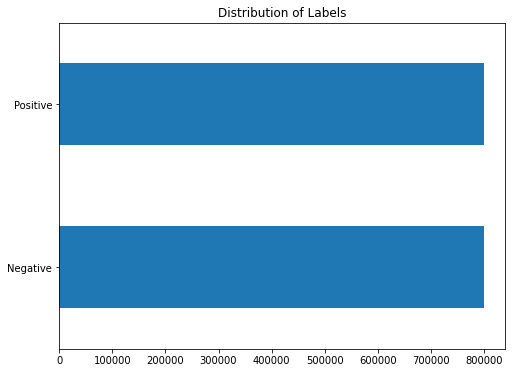

In [9]:
ax=data.sentiment.value_counts().plot(kind='barh',figsize=(8,6),title="Distribution of Labels")
ax.set_yticklabels(['Negative','Positive'], rotation=0)


In [11]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [12]:
#Converting Tweets to LowerCase
data["text"]=data.text.str.lower()

#Replacing Links with "URL"
data["text"]=data["text"].str.replace(r'https?://[^\s<>"]+|www\.[^\s<>"]+', "URL")

#Removing the Usernames
data["text"]=data["text"].str.replace(r'@[^\s]+',"")

#Removing all Non Alpha Numeric Characters
data["text"]=data["text"].str.replace(r'[^A-Za-z0-9 ]+',"")

#Removng Stopwords
stop_words = stopwords.words('english') 
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))


#Lementize
wordlem = WordNetLemmatizer()
data['text']=data['text'].apply(lambda x: ' '.join([wordlem.lemmatize(word) for word in x.split()]))



# df[''] = df['Links'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])


In [13]:
data.head()

,text,sentiment
135312,think 40 mark 90 suck really answer wasnt bad ...,0
511800,omg missed saying 50th update anyway here rash...,0
994982,going good friendslollove ya,1
564167,dont know deal lol wish could bad boy good u m...,0
120243,killer sore throat making sad,0


In [14]:
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['sentiment'],test_size = 0.10, random_state = 0)

In [15]:
X_train.shape,X_test.shape

((1440000,), (160000,))

In [16]:
#Vectorsing the Tweets
vectorizer=TfidfVectorizer(max_df=0.9,min_df=20,max_features=10000,ngram_range=(1,3))
vectorizer.fit(X_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.9, max_features=10000,
                min_df=20, ngram_range=(1, 3), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [17]:
print ("Vocab Size:",len(vectorizer.get_feature_names()))

Vocab Size: 10000


In [18]:
# Applyting TF-ID
X_train=vectorizer.transform(X_train)
X_test=vectorizer.transform(X_test)

In [19]:
X_train.shape

(1440000, 10000)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   25.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   25.4s finished


Training....
Acc:  0.78545625
F1 Score:  0.7888257983549981


Text(0.5, 1.05, 'Confussion Matrix')

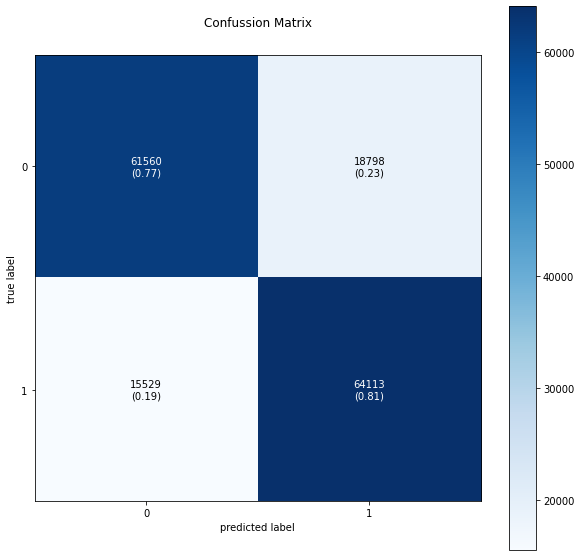

In [20]:
#Training Logitistic Regression
lr=LogisticRegression(verbose=3,max_iter=100)
lr.fit(X_train,y_train)
print ('Training....')

pred=lr.predict(X_test)
acc=accuracy_score(y_test,pred)
f1=f1_score(y_test,pred)
confussion=confusion_matrix(y_test,pred,labels=[0,1])
print ("Acc: ",acc)
print ("F1 Score: ",f1)


fig, ax = plot_confusion_matrix(conf_mat=confussion,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                               figsize=(10,10))
plt.title('Confussion Matrix')

Acc:  0.76923125
F1 Score:  0.7741090820103392


Text(0.5, 1.05, 'Confussion Matrix')

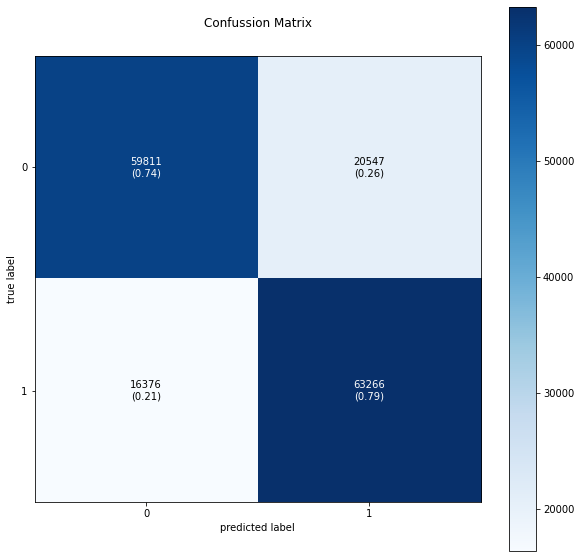

In [21]:
# BNB
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
pred=bnb.predict(X_test)
acc=accuracy_score(y_test,pred)
f1=f1_score(y_test,pred)
confussion=confusion_matrix(y_test,pred,labels=[0,1])

print ("Acc: ",acc)
print ("F1 Score: ",f1)

fig, ax = plot_confusion_matrix(conf_mat=confussion,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                               figsize=(10,10))
plt.title('Confussion Matrix')

Acc:  0.78455625
F1 Score:  0.7889474618714374


Text(0.5, 1.05, 'Confussion Matrix')

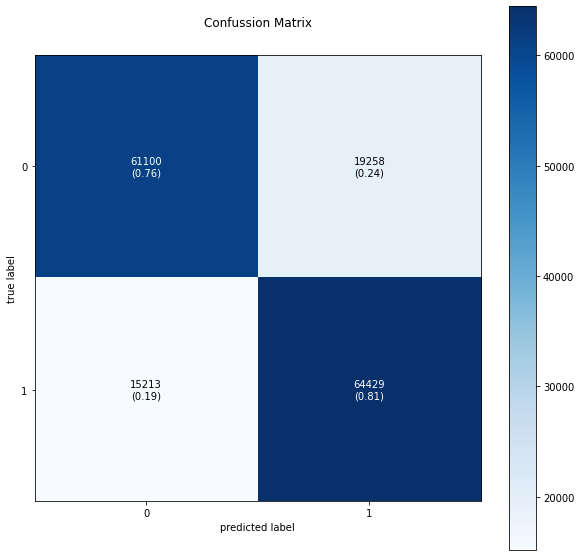

In [22]:
# SVC
svc = LinearSVC()
svc.fit(X_train, y_train)
pred=svc.predict(X_test)
acc=accuracy_score(y_test,pred)
f1=f1_score(y_test,pred)
confussion=confusion_matrix(y_test,pred,labels=[0,1])

print ("Acc: ",acc)
print ("F1 Score: ",f1)

fig, ax = plot_confusion_matrix(conf_mat=confussion,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                               figsize=(10,10))
plt.title('Confussion Matrix')

Acc:  0.769125
F1 Score:  0.7700963429510319


Text(0.5, 1.05, 'Confussion Matrix')

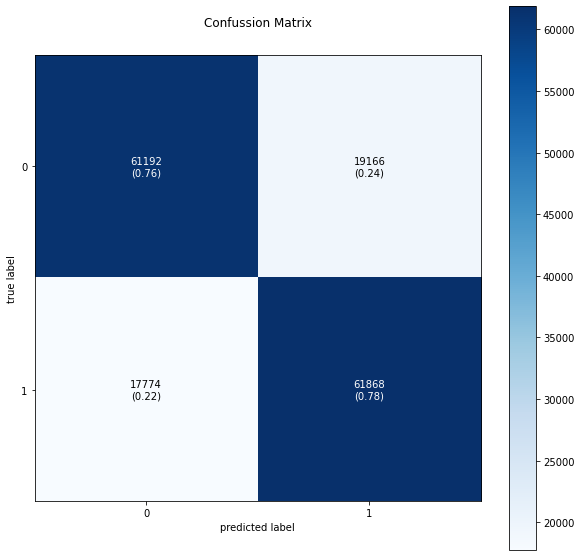

In [23]:
# SVC
nb = MultinomialNB()
nb.fit(X_train, y_train)
pred=nb.predict(X_test)
acc=accuracy_score(y_test,pred)
f1=f1_score(y_test,pred)
confussion=confusion_matrix(y_test,pred,labels=[0,1])

print ("Acc: ",acc)
print ("F1 Score: ",f1)

fig, ax = plot_confusion_matrix(conf_mat=confussion,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                               figsize=(10,10))
plt.title('Confussion Matrix')

Acc:  0.65734375
F1 Score:  0.7210619234898169


Text(0.5, 1.05, 'Confussion Matrix')

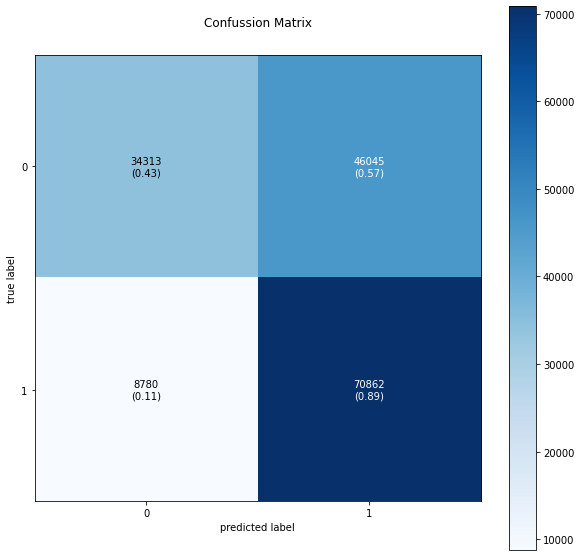

In [24]:
params={'eta': 0.1,
 'objective':'binary:logistic',
 'max_depth': 6,
 'n_estimators': 20,
 'early_stopping_rounds': 10,
 'n_jobs': -1,
 'verbose': 1
 }

# xg_train=xgboost.DMatrix(X_train,label=Y_train)
# model=xgboost.XGBClassifier()train(params,xg_train,50)

xg=xgboost.XGBClassifier(**params)
xg.fit(X_train,y_train)

pred=xg.predict(X_test)
acc=accuracy_score(y_test,pred)
f1=f1_score(y_test,pred)
confussion=confusion_matrix(y_test,pred,labels=[0,1])

print ("Acc: ",acc)
print ("F1 Score: ",f1)

fig, ax = plot_confusion_matrix(conf_mat=confussion,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                               figsize=(10,10))
plt.title('Confussion Matrix')

In [25]:
def preprocess(tweet):
    #LowerCase 
    tweet=tweet.lower()

    #Replacing URL
    tweet=tweet.replace(r'https?://[^\s<>"]+|www\.[^\s<>"]+', "URL")

    #Removing Username
    tweet=tweet.replace(r'@[^\s]+',"")

    #Removing Non-Alpha Numeric Chars
    tweet=tweet.replace(r'[^A-Za-z0-9 ]+',"")


    stop_words = stopwords.words('english') 
    text_tokens = word_tokenize(tweet)
    tokens_without_sw = [word for word in text_tokens if not word in stop_words]
    

    #Lementize
    wordlem = WordNetLemmatizer()
    tokens_without_sw=[wordlem.lemmatize(word) for word in tokens_without_sw]
    filtered_sentence = (" ").join(tokens_without_sw)



    return filtered_sentence

In [27]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [28]:
#Testing 
tweet="I am sad"
tweet=preprocess(tweet)
tweet=vectorizer.transform([tweet])
lr.predict(tweet)

array([0])

In [29]:
file = open('tfidf-ngram-(1,3).pickle','wb')
pickle.dump(vectorizer, file)
file.close()

file = open('lr.pickle','wb')
pickle.dump(lr, file)
file.close()

file = open('svc.pickle','wb')
pickle.dump(svc, file)
file.close()

In [30]:
def load_models():
    # Load the vectoriser.
    file = open('tfidf-ngram-(1,3).pickle', 'rb')
    vectorizer = pickle.load(file)
    file.close()
    
    # Load the LR Model.
    file = open('lr.pickle', 'rb')
    lr = pickle.load(file)
    file.close()
    
    return vectorizer, lr



def predict(vectorizer,model,tweets):

    preproc=[]
    for tweet in tweets:
        preproc.append(preprocess(tweet))

    vect=vectorizer.transform(preproc)
    sent=model.predict(vect)

    data = []
    for text, pred in zip(tweets, sent):
        data.append((text,pred))

    df=pd.DataFrame(data,columns=["Tweets","Sentiment"])
    df = df.replace([0,1], ["Negative","Positive"])

    return df



In [31]:
vect,model=load_models()
tdf=predict(vect,model,["I am happy","I am sad"])

In [32]:
tdf

,Tweets,Sentiment
0,I am happy,Positive
1,I am sad,Negative


In [33]:
from textblob import TextBlob
testimonial = TextBlob("this notebook helps you to understand. It is so good")
testimonial.sentiment

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

In [34]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
vs = analyzer.polarity_scores(X_test[0])
vs

ModuleNotFoundError: ignored